# **Lab 7 — Matplotlib**
---

## Introduction

Data visualization is a crucial skill to have in your toolbox. Thankfully, there are Python solutions which make producing publication-quality graphs straightforward! In this lab you'll practice using Matplotlib, the *de facto* standard plotting library for Python, to create various types of graphs.

Your deliverable for this lab will be this notebook, with "deliverables" completed as requested below, **as well as the data file you use for Deliverable 5**. The "exercises" are exploratory and not graded. Please rename the notebook from `lab_07.ipynb` to `<last_name>_lab_07.ipynb` prior to submission. Download the file using File $\rightarrow$ Download .ipynb. Submit it to Canvas, along with your data file, under the Lab 7 assignment **no later than midnight Thursday, October 14th**.

## Resources

[Matplotlib website](https://matplotlib.org/)  
[Gallery of Matplotlib plots](https://matplotlib.org/gallery/index.html)

## Exercise I: Simple plots

You have already seen several Matplotlib-created plots in previous labs. To use Matplotlib, you'll almost always want to start by importing the `pyplot` module:

```python
import matplotlib.pyplot as plt
```

Then you can accomplish most plotting tasks using the format `plt.command_name_here()`. Here is a basic Matplotlib figure example:

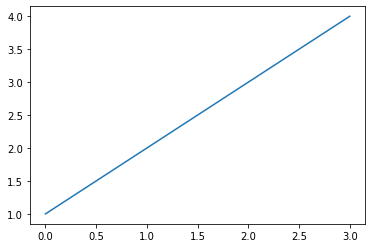

In [1]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.show()

In this example, we used the [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) command with a single list of values. If only one list is provided, Matplotlib assumes that it is a sequence of values ($y$-axis) to be plotted over a sequence that corresponds to the indices in that list ($x$-axis). We also use the [`show()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html) command to display the plot that we generated. (Note that you don't have to do that; you could, for instance, use [`savefig('test.png')`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig) to save it to the file `test.png` in the current folder.) Now let's try a slightly more advanced example using NumPy.

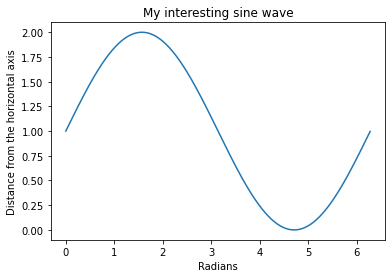

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 2 * np.pi, 0.01)
s = 1 + np.sin(t)
plt.plot(t, s)

plt.xlabel('Radians')
plt.ylabel('Distance from the horizontal axis')
plt.title('My interesting sine wave')

plt.show()

In this example, we use NumPy to generate $x$ and $y$ values. We also label the plot axes and provide a title using the self-explanatory `xlabel()`, `ylabel()`, and `title()` commands. You can view all of the commands [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot).

## Deliverable 1

Make a plot of $u(t) = \cos(2t) + 2$ on the interval $[0, \pi]$. Give your plot $x$- and $y$-axis labels and a title (feel free to make these as pointless as you want). Include your plot in a **new code cell below** (make sure your plot is displayed).

## Exercise II: Variations in `pyplot`

### Line attributes

Each line plot can be changed with different attributes. The line color, width, and style may be changed, for example. As an example, we can modify our previous sine function plot:

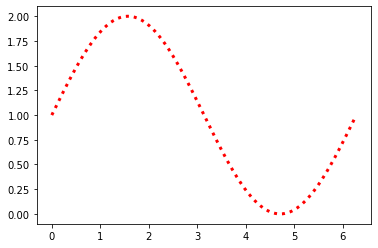

In [4]:
t = np.arange(0, 2 * np.pi, 0.01)
s = 1 + np.sin(t)
plt.plot(t, s, color='red', linewidth=3.0, linestyle='dotted')

plt.show()

Try experimenting with changing the color, line width, and line style of the above plot. You can also skim [this tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) to learn more about how to change plot features.

### Multiple lines

You can plot multiple lines on the same plot by calling `plot()` more than once:

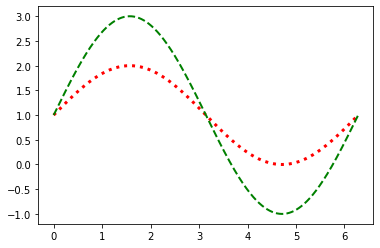

In [5]:
t = np.arange(0, 2 * np.pi, 0.01)
s = 1 + np.sin(t)

plt.plot(t, s, color='red', linewidth=3.0, linestyle='dotted')
plt.plot(t, (2 * s) - 1, color='green', linewidth=2.0, linestyle='dashed')

plt.show()

### Legends

But now, you probably want a legend to understand what these two lines mean! The easiest way to create a legend is to give each of your `plot()` commands the optional argument `label='my_label_here'`, and then call [`legend()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) prior to the `show()` command — like so:

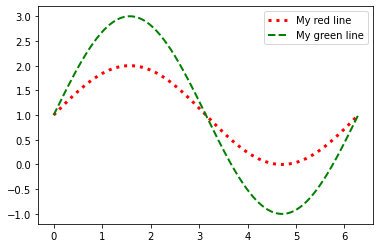

In [6]:
t = np.arange(0, 2 * np.pi, 0.01)
s = 1 + np.sin(t)

plt.plot(t, s, color='red', linewidth=3.0, linestyle='dotted', label='My red line')
plt.plot(t, (2 * s) - 1, color='green', linewidth=2.0, linestyle='dashed', label='My green line')

plt.legend()

plt.show()

## Exercise III: More involved plotting

Now that you've experimented around with some basic plotting, let's read in a more interesting dataset to plot. Run the following code cell to load in some GPS data from a station in the Aleutians (the large jump is the [2020-07-22 M7.8 Simeonof Earthquake](http://www.grapenthin.org/notes/2020_07_24_Simeonof_eq/)).

In [8]:
!pip install pandas

  Using cached pandas-1.3.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)


In [9]:
import pandas as pd
from datetime import datetime
    
df = pd.read_csv('ftp://data-out.unavco.org/pub/products/position/AC12/AC12.cwu.nam14.csv', header=11) #read in the file

dates = [datetime.strptime(d, '%Y-%m-%d') for d in df['Date']] #convert date strings into datetime objects
t = [d.days for d in np.array(dates) - dates[0]]#create a new list of days since the start for each sample

x = df[' East (mm)'].values #east displacement, .values returns the values as a numpy array instead of pandas Series
y = df[' North (mm)'].values
z = df[' Vertical (mm)'].values

x_std = df[' East Std. Deviation (mm)'].values

The above code cell reads in a CSV file (using pandas, which downloads the file from a remote server for you!) and defines the following six variables:

* `dates` — [datetime](https://docs.python.org/3/library/datetime.html) object representing the date of each data point
* `t` — Days since 6 May 2008 (these are daily position measurements)
* `x`, `y`, `z` — East, north, and vertical displacements in mm (relative to position on 6 May 2008)
* `x_std` — The standard deviation of each measurement in `x` in mm

We can get a very basic view of these data using the following code:

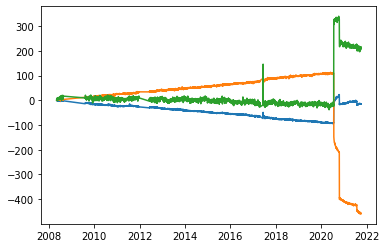

In [12]:
plt.plot(dates, x)
plt.plot(dates, y)
plt.plot(dates, z)
plt.show()

## Deliverable 2

In a **new code cell below**, re-create the above plot but add a legend with labels for each line as well as appropriate $x$- and $y$-axis labels.

### Subplots

Sometimes you want to plot several quantities, each on their own axis. You can accomplish this with the [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot) command. This command adds a new "subplot" to your figure. The syntax is `subplot(num_rows, num_cols, index)`, where `index` starts at 1 (yes, 1 rather than 0, strangely). For example, `subplot(2, 2, 1)` plots into the first axis of a 2 $\times$ 2 grid of subplots. Here's an example that shows the GPS east displacement and the associated standard deviation:

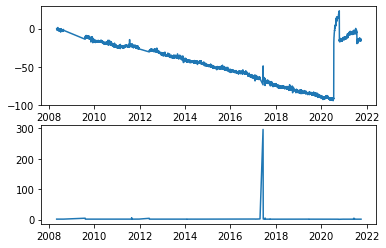

In [19]:
plt.subplot(2, 1, 1)  # 2 x 1 subplot grid, 1st plot
plt.plot(dates, x)
plt.subplot(2, 1, 2)  # 2 x 1 subplot grid, 2nd plot
plt.plot(dates, x_std)

plt.show()

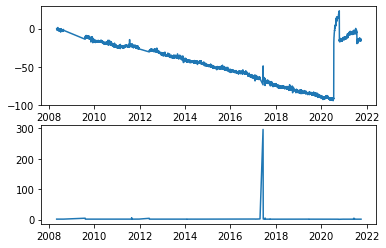

In [22]:
#an alternative syntax is:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(dates,x)#here the 'ax' object has all the same functions as 'plt', you just have to specify which axes to use
ax[1].plot(dates, x_std)
plt.show()

## Deliverable 3

Re-create the plot shown below using what you've learned thus far.

<img src="https://raw.githubusercontent.com/uafgeoteach/GEOS636_PAG/master/lab_07_subplots.png" width=550>

Include your code in a **new code cell below**. You can use the command [`plt.tight_layout()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tight_layout.html#matplotlib.pyplot.tight_layout) before `plt.show()` to make more room for axis labels (makes the plot look nicer).

### Scatter plots

So far we've focused on line plots, but scatter plots are another common type of visual. They can be created using the [`scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) command, which requires two arguments: The $x$ and $y$ data values. Let's plot east displacement versus north displacement:

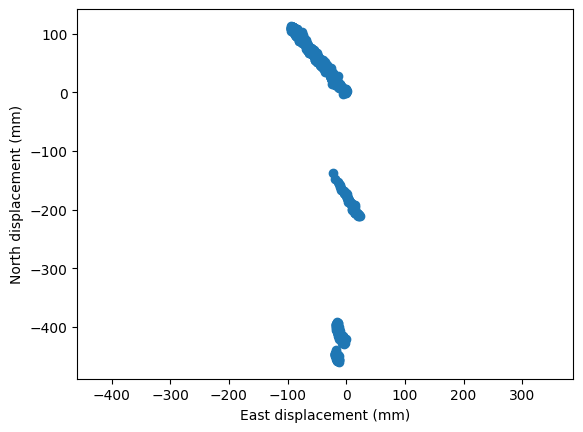

In [24]:
plt.scatter(x, y)
plt.xlabel('East displacement (mm)')
plt.ylabel('North displacement (mm)')
plt.axis('equal')
plt.show()

Here we use [`axis('equal')`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib.pyplot.axis) to ensure that 1 mm has the same length on the $y$-axis as it does on the $x$-axis.

## Deliverable 4

The above plot isn't very interesting since it doesn't show us how the position changes over time. It'd be good to color these points by time. In a **new code cell** below, replicate the above plot but additionally color the points by time `t` as well as add a colorbar to indicate what the colored points represent.

> **Note:** You'll need to read the documentation for the `scatter()` command to figure out how to color the points. For the colorbar, remember that you can view all of the functions provided by `pyplot` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot).

If you get stuck, turn to the documentation first, and then Google! Reading documentation is a crucial skill for programmers.

## Deliverable 5

Find some data file (you can use the file you used for last week's lab), upload it to Opensarlab, load it into this notebook (again, you may use code from last week!) and generate a plot. Label all the axes, give it a title, and display it. **Include your code in a code cell below, and submit your data file with your notebook.**


This lab only scratches the surface of what Matplotlib can do. See [this overview](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py) for many more examples!